# Python's property(): Add Managed Attributes to Your Classes

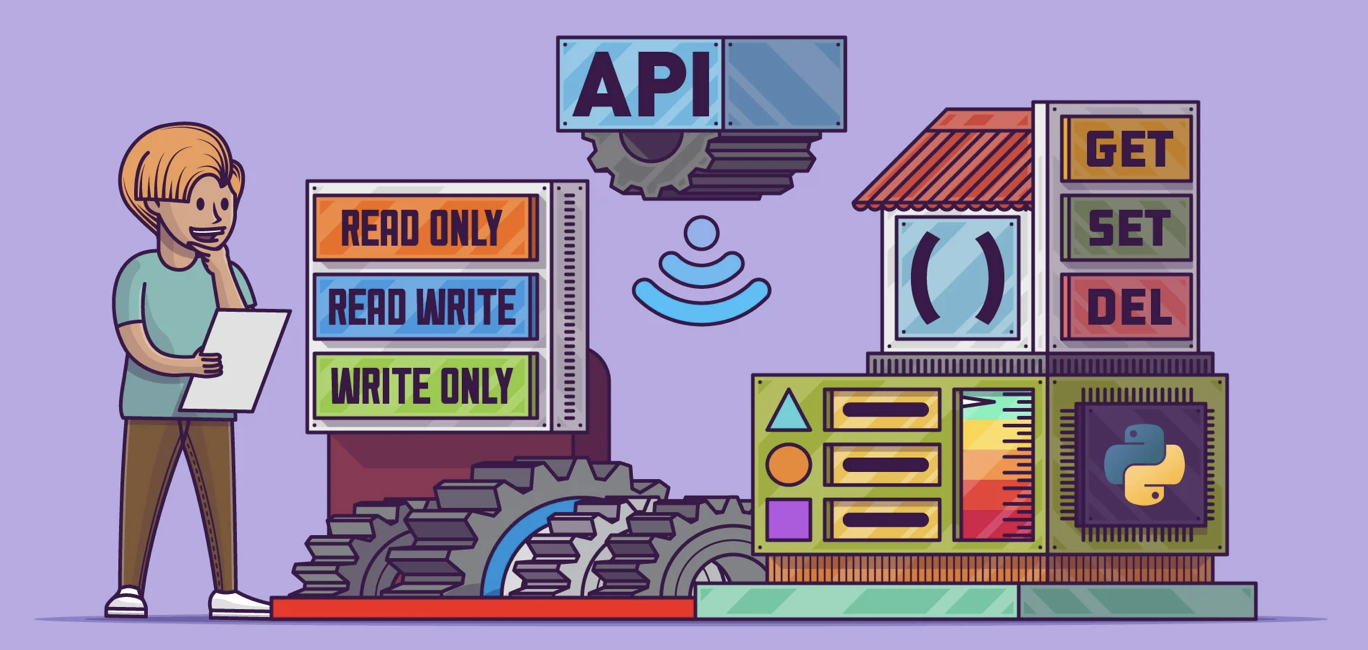

https://realpython.com/python-property/

Python предоставляет нам встроенный декоратор @property, который значительно упрощает использование геттеров и сеттеров в объектно-ориентированном программировании.

Предположим, что мы решили создать класс, который хранит температуру в градусах Цельсия. Кроме того, он должен реализовать метод для преобразования температуры в градусы Фаренгейта.

Это можно сделать следующим образом:



In [1]:
class Celsius:
    def __init__(self, temperature = 0):
        self.temperature = temperature

    def to_fahrenheit(self):
        return (self.temperature * 1.8) + 32

Мы можем создавать объекты этого класса и манипулировать атрибутом температуры по своему усмотрению:

In [2]:
# Basic method of setting and getting attributes in Python
class Celsius:
    def __init__(self, temperature=0):
        self.temperature = temperature

    def to_fahrenheit(self):
        return (self.temperature * 1.8) + 32


# Create a new object
human = Celsius()

# Set the temperature
human.temperature = 37

# Get the temperature attribute
print(human.temperature)

# Get the to_fahrenheit method
print(human.to_fahrenheit())

37
98.60000000000001


Таким образом, всякий раз, когда мы присваиваем или получаем какой-либо атрибут объекта, например temperature, как показано выше, Python ищет его во встроенном объекте __dict__ как атрибут этого встроенного словаря:

In [3]:
print(human.__dict__) 

{'temperature': 37}


Поэтому human.temperature внутренне становится ```human.__dict__['temperature']```.

In [5]:
print(human.__dict__['temperature']) # Просто по ключу словаря получаем значение

37


### Использование геттеров и сеттеров
Using Getters and Setters

Я, надеюсь, вы помните, для чего делают реализации классов с приватными свойствами, а затем, добавляют еще методы (геттеры, сеттеры, делиттеры) для работы с ними? Да, это необходимо, чтобы не нарушалась внутренняя логика работы алгоритма класса, а взаимодействие с классом и его объектами извне осуществлялась бы только через разрешенные (публичные) методы и свойства. 

Предположим, мы хотим расширить возможности использования класса Celsius, определенного выше. Мы знаем, что температура любого объекта не может быть ниже -273,15 градусов Цельсия.

Давайте обновим наш код, чтобы реализовать это ограничение на значение.

Очевидным решением вышеуказанного ограничения будет скрыть атрибут temperature (сделать его приватным) и определить новые методы getter и setter для работы с ним.

Это можно сделать следующим образом:

In [ ]:
# Making Getters and Setter methods
class Celsius:
    def __init__(self, temperature=0):
        self.set_temperature(temperature) # Call setter.

    def to_fahrenheit(self):
        return (self.get_temperature() * 1.8) + 32 # Call setter.

    # getter method
    def get_temperature(self): # We will get value
        return self._temperature

    # setter method
    def set_temperature(self, value): # We will set value if conditional is true
        if value < -273.15:
            raise ValueError("Temperature below -273.15 is not possible.")
        self._temperature = value

Как мы видим, приведенный выше код вводит два новых метода get_temperature() - getter и set_temperature() - setter.
Кроме того, temperature была заменена на _temperature. Подчеркивание _ в начале используется для обозначения защищенного режима доступа (protected).

Теперь давайте воспользуемся этой реализацией:

In [10]:
# Making Getters and Setter methods
class Celsius:
    def __init__(self, temperature=0):
        self.set_temperature(temperature)

    def to_fahrenheit(self):
        return (self.get_temperature() * 1.8) + 32

    # getter method
    def get_temperature(self):
        return self._temperature

    # setter method
    def set_temperature(self, value):
        if value < -273.15:
            raise ValueError("Temperature below -273.15 is not possible.")
        self._temperature = value


# Create a new object, set_temperature() internally called by __init__
human = Celsius(37)

# Get the temperature attribute via a getter
print(human.get_temperature())

# Get the to_fahrenheit method, get_temperature() called by the method itself
print(human.to_fahrenheit())

# new constraint implementation
human.set_temperature(-300)

# Get the to_fahreheit method
print(human.to_fahrenheit())

37
98.60000000000001


ValueError: Temperature below -273.15 is not possible.

Этот код успешно реализовало новое ограничение. Нам больше не разрешается устанавливать температуру ниже -273,15 градусов Цельсия.

Примечание: приватные переменные на самом деле не существуют в Python. Просто существуют нормы, которым необходимо следовать. Сам язык не накладывает никаких ограничений.

### Где здесь могут возникнуть проблемы и неудобства?

Например, все программы, которые **УЖЕ** реализовали наш предыдущий класс, должны изменить свой код обращения к атрибутам через геттеры и сеттеры с ```obj.temperature``` на ```obj.get_temperature()``` и все выражения типа ```obj.temperature = val``` на ```obj.set_temperature(val)```.

Такой рефакторинг может вызвать проблемы при работе с сотнями тысяч строк кода. В общем, наше новое обновление не имело обратной совместимости. 

Вторая проблема возникает, когда нам нужно прописывать разные сеттеры и геттеры для разных приватных атрибутов экземпляров класса (не только для одного атрибута temperature). Например, добавить еще два метода для no_name_atribute. В результате, пользователю этого класса (программисту) придется запоминать и держать в голове названия имен всех этих сеттеров и геттеров.

Для решения вышеперечисленных проблем можно воспользоваться объектом property.

Класс Property.

С помощью property() в Python вы можете создавать управляемые атрибуты в своих классах. Управляемые атрибуты, также известные как свойства (англ. properties), используются, если вам нужно изменять их внутреннюю реализацию без изменения общедоступного API класса. Когда пользователи полагаются на ваши классы и объекты, важно, чтобы ваш API был стабильным.

Возвращаемое значение property() – это сам управляемый атрибут. Если вы обращаетесь к управляемому атрибуту, как в

Из документации:

```
class property(object)
 |  property(fget=None, fset=None, fdel=None, doc=None)
 |  
 |  Property attribute.
 |  
 |    fget
 |      function to be used for getting an attribute value
 |    fset
 |      function to be used for setting an attribute value
 |    fdel
 |      function to be used for del'ing an attribute
 |    doc
 |      docstring
```

fget - это функция для получения значения атрибута. 

fset - это функция для установки значения атрибута. 

fdel - это функция для удаления значения атрибута.

Типичное использование - определение управляемого атрибута x:

```Py
class C:
    def __init__(self):
        self._x = None

    def getx(self):
        return self._x

    def setx(self, value):
        self._x = value

    def delx(self):
        del self._x

    x = property(getx, setx, delx, "I'm the 'x' property.")
```
Возвращаемое значение property() – это сам управляемый атрибут. Если вы обращаетесь к управляемому атрибуту, как c.x, c.x = value, del c.x:
Если c является экземпляром C, то c.x вызовет getter, c.x = value вызовет setter, а del c.x - deleter.

property() также может работать как декоратор
Чаще всего Property используют в качестве декоратора. (Рассмотрим далее)

Вот как мы можем обновить наш код:
В самом классе Celsius мы пропишем атрибут и придумаем ему имя, допустим, temperature.

In [11]:
# using property class
class Celsius:
    def __init__(self, temperature=0):
        self.temperature = temperature # will call setter

    def to_fahrenheit(self):
        return (self.temperature * 1.8) + 32 # will call getter

    # getter
    def get_temperature(self):
        print("Getting value...") # print in the getter
        return self._temperature

    # setter
    def set_temperature(self, value):
        print("Setting value...") # printvin the setter
        if value < -273.15:
            raise ValueError("Temperature below -273.15 is not possible")
        self._temperature = value

    # creating a property object
    temperature = property(get_temperature, set_temperature) # <--- Этот атрибут класса будет ссылаться на объект property, которому мы передадим ссылку на геттер и сеттер:

Теперь, из каждого экземпляра класса мы совершенно спокойно можем обращаться к атрибуту класса temperature. Этот атрибут является объектом property. Данный объект так устроен, что при считывании данных он вызывает первый метод get_temperature, этот метод возвращает значение приватного локального свойства _temperature экземпляра класса и именно это значение дальше возвращается атрибутом temperature. 
```
human = Celsius(37)
a = human.temperature # 37
```
Поэтому переменная a будет ссылаться на соответствующее значение self._temperature.

Для понимания материала, можно было упростить до вида:
```
class Celsius:
    def __init__(self, temperature=0):
        self.__temperature = temperature
    def to_fahrenheit(self):
        return (self.temperature * 1.8) + 32
    # getter
    def get_temperature(self):
        return self.__temperature
    # setter
    def set_temperature(self, value):
        self.__temperature = value
    # creating a property object
    temperature = property(get_temperature, set_temperature)
```
Но оставим как есть

Давайте воспользуемся этим кодом:

In [16]:
# using property class
class Celsius:
    def __init__(self, temperature=0):
        self.temperature = temperature

    def to_fahrenheit(self):
        return (self.temperature * 1.8) + 32

    # getter
    def get_temperature(self):
        print("Getting value...")
        return self._temperature

    # setter
    def set_temperature(self, value):
        print("Setting value...")
        if value < -273.15:
            raise ValueError("Temperature below -273.15 is not possible")
        self._temperature = value

    # creating a property object
    temperature = property(get_temperature, set_temperature)


human = Celsius(37)

print(human.temperature)

print(human.to_fahrenheit())

human.temperature = -300

Getting value...
Setting value...
Getting value...
37
Getting value...
98.60000000000001
Setting value...


ValueError: Temperature below -273.15 is not possible

Как мы видим, любая инструкция, которая получает значение temperature, автоматически вызывает get_temperature() вместо поиска по словарю (```__dict__```).

Аналогично, любая инструкция, которая присваивает значение temperature, автоматически вызывает set_temperature().

```human = Celsius(37) # prints Setting value...```

Примечание: Фактическое значение temperature хранится в переменной _temperature. Атрибут temperature - это объект property, который предоставляет интерфейс к этой переменной.

Таким образом, наша реализация является обратно совместимой. И теперь нам не нужно запоминать различные методы.

Однако, в нашей реализации есть некое функциональное дублирование: мы можем работать с приватным свойством _temperature и через сеттер/геттер и через свойство класса Celsius. Давайте сделаем один интерфейс взаимодействия со свойством _temperature.

### The @property Decorator

Декоратор @property
```
@decorator
def func(a):
    return a

This syntax is equivalent to the following:

def func(a):
    return a

func = decorator(func)
```

Из документации:

```
class property(object)
 |  property(fget=None, fset=None, fdel=None, doc=None)
 |  
 |  Property attribute.
 |  
 |    fget
 |      function to be used for getting an attribute value
 |    fset
 |      function to be used for setting an attribute value
 |    fdel
 |      function to be used for del'ing an attribute
 |    doc
 |      docstring
```

Как видно из реализации, эти параметры функции являются необязательными.
Почему они являются необязательными?

Ex:
```
# circle.py

class Circle:
    def __init__(self, radius):
        self._radius = radius

    def _get_radius(self):
        print("Get radius")
        return self._radius

    def _set_radius(self, value):
        print("Set radius")
        self._radius = value

    def _del_radius(self):
        print("Delete radius")
        del self._radius

    radius = property(
        fget=_get_radius, # <---
        fset=_set_radius,
        fdel=_del_radius,
        doc="The radius property."
    )
```


Объект Property имеет три метода, getter(), setter() и deleter(), чтобы указать fget, fset и fdel в более поздний момент. Это означает, что строку:
```Py
temperature = property(get_temperature,set_temperature)
```
можно разделить на:
```Py
# make empty property
temperature = property()

# assign fget. assign - назначать
temperature = temperature.getter(get_temperature)

# assign fset
temperature = temperature.setter(set_temperature)
```
Эти два фрагмента кода эквивалентны.

Класс property позволяет нам на уровне его объектов, использовать функции-декораторы. Если в консоли прописать:
```Py
a = property()
```
то через ссылку a нам будут доступны эти самые функции:
```
a.getter() – декоратор для сеттера;
a.setter() – декоратор для геттера;
a.deleter() – декоратор для делитера.
```

При вызове метода setter осуществляется встраиванием метода set_temperature в алгоритм работы объекта property. И то же самое делает метод getter только для геттера. В обоих случаях они возвращают ссылку на объект property, который мы должны сохранять.

Приведенные выше конструкции могут быть реализованы в виде декораторов.

Мы можем даже не определять имена get_temperature и set_temperature, поскольку они не нужны и "загрязняют" пространство имен класса.

Для этого мы повторно используем имя temperature при определении наших функций getter и setter. Давайте рассмотрим, как реализовать это в виде декоратора:

Перед геттером (обратите внимание, именно перед геттером, а не сеттером или делитером) прописывается декоратор @Property:
temperature теперь представляет объект-свойство с именем get_old:

In [17]:
# Using @property decorator
class Celsius:
    def __init__(self, temperature=0):
        self.temperature = temperature

    def to_fahrenheit(self):
        return (self.temperature * 1.8) + 32

    @property
    def temperature(self): # getter
        print("Getting value...")
        return self._temperature

    @temperature.setter
    def temperature(self, value): # setter
        print("Setting value...")
        if value < -273.15:
            raise ValueError("Temperature below -273 is not possible")
        self._temperature = value


# create an object
human = Celsius(37)

print(human.temperature)

print(human.to_fahrenheit())

coldest_thing = Celsius(-300)

Setting value...
Getting value...
37
Getting value...
98.60000000000001
Setting value...


ValueError: Temperature below -273 is not possible

Приведенная выше реализация проста и эффективна. Это рекомендуемый способ использования Property.

#### Ex1:

In [4]:
class Person:
    def __init__(self, name, old):
        self.__name = name
        self.__old = old
    
    def get_old(self):
        return self.__old
 
    def set_old(self, old):
        self.__old = old

    old = property(get_old, set_old)

p = Person('John', 20)
print(p.__dict__)
print(Person.__dict__)
p.old

{'_Person__name': 'John', '_Person__old': 20}
{'__module__': '__main__', '__init__': <function Person.__init__ at 0x106b556c0>, 'get_old': <function Person.get_old at 0x106b55760>, 'set_old': <function Person.set_old at 0x106b55800>, 'old': <property object at 0x106b02ac0>, '__dict__': <attribute '__dict__' of 'Person' objects>, '__weakref__': <attribute '__weakref__' of 'Person' objects>, '__doc__': None}


20

 Из каждого экземпляра класса мы совершенно спокойно можем обращаться к атрибуту класса old. Этот атрибут является объектом property. Данный объект так устроен, что при считывании данных он вызывает первый метод get_old, этот метод возвращает значение приватного локального свойства __old экземпляра класса p и именно это значение дальше возвращается атрибутом old. Поэтому переменная a будет ссылаться на значение текущего возраста сотрудника.
 Если же мы обращаемся к атрибуту класса old и присваиваем ему какое-то значение:
 ```Py
p.old = 35
 ```
 то автоматически вызывается второй метод set_old и в локальное свойство __old заносится значение, указанное после оператора присваивания. В итоге, в текущем объекте p меняется локальное свойство __old на новое.

In [31]:
class Person:
    def __init__(self, name, old):
        self.__name = name
        self.__old = old
    
    def get_old(self):
        return self.__old
 
    def set_old(self, old):
        self.__old = old

    old = property(get_old, set_old)

p = Person('John', 20)
print(f"p.__dict__ is {p.__dict__}")
print(f"p.old is {p.old}")
p.old = 35
print(f"p.__dict__ is {p.__dict__}")
print(f"p.old is {p.old}")

p.__dict__ is {'_Person__name': 'John', '_Person__old': 20}
p.old is 20
p.__dict__ is {'_Person__name': 'John', '_Person__old': 35}
p.old is 35


Здесь у вас может возникнуть резонный вопрос, почему строчка:
```Py
p.old = 35
```
не создает новое локальное свойство внутри объекта p, как это у нас было ранее в программах, а обращается именно к атрибуту класса Person? Все дело в приоритете. Если в классе задан атрибут как объект-свойство, то в первую очередь выбирается оно, даже если в экземпляре класса есть локальное свойство с таким же именем. В этом легко убедиться. Давайте создадим свойство с именем old прямо в объекте p через словарь __dict__ а, затем выведем всю информацию в консоль:

In [32]:
class Person:
    def __init__(self, name, old):
        self.__name = name
        self.__old = old
    
    def get_old(self):
        return self.__old
 
    def set_old(self, old):
        self.__old = old

    old = property(get_old, set_old)

p = Person('John', 20)
print(f"p.__dict__ is {p.__dict__}")
print(f"p.old is {p.old}")
p.old = 35
print(f"p.__dict__ is {p.__dict__}")
print(f"p.old is {p.old}")
p.__dict__['old'] = 'old in object p'
print(f"p.__dict__ is {p.__dict__}")
print(f"p.old is {p.old}")

p.__dict__ is {'_Person__name': 'John', '_Person__old': 20}
p.old is 20
p.__dict__ is {'_Person__name': 'John', '_Person__old': 35}
p.old is 35
p.__dict__ is {'_Person__name': 'John', '_Person__old': 35, 'old': 'old in object p'}
p.old is 35


Отображается значение 35, а не строка, то есть, было обращение именно к объекту-свойству old класса Person. А если свойству old в классе присвоить, какое-либо числовое значение, например, то будет отображена строка из объекта p. Здесь уже срабатывают знакомые нам приоритеты: сначала локальная область видимости объекта, затем, класса. Вот этот момент нужно хорошо знать, при работе с объектами-свойствами.

#### Ex2:

И пример делиттера, который вызывается при удалении свойства:
```Py
@temperature.deleter
    def temperature(self):
        del self._temperature


del human.temperature
```

deleter:
```Py
# circle.py
class Circle:
    def __init__(self, radius):
        self._radius = radius

    @property
    def radius(self):
        """The radius property."""
        print("Get radius")
        return self._radius

    @radius.setter
    def radius(self, value):
        print("Set radius")
        self._radius = value

    @radius.deleter
    def radius(self):
        print("Delete radius")
        del self._radius
```

### Providing Read-Only Attributes
Предоставление атрибутов, доступных только для чтения

Возможно, самым элементарным случаем использования property() является предоставление атрибутов, доступных только для чтения, в ваших классах. Скажем, вам нужен неизменяемый класс Point, который не позволяет пользователю изменять исходное значение его координат, x и y. Для достижения этой цели вы можете создать Point, как в следующем примере:

In [33]:
# point.py

class Point:
    def __init__(self, x, y):
        self._x = x
        self._y = y

    @property
    def x(self):
        return self._x

    @property
    def y(self):
        return self._y

Здесь вы храните входные аргументы в атрибутах ._x и ._y. Как вы уже узнали, использование подчеркивания (_) в именах говорит другим разработчикам, что это непубличные атрибуты и к ним нельзя обращаться с помощью точечной нотации, как, например, в point._x. Наконец, вы определяете два метода getter и декорируете их @property.

Теперь у вас есть два свойства, доступных только для чтения, .x и .y, в качестве координат:

In [34]:
point = Point(12, 5)

# Read coordinates
point.x

point.y


# Write coordinates
point.x = 42

AttributeError: property 'x' of 'Point' object has no setter

Вы можете пойти немного дальше и предоставить явные методы-установщики, которые вызывают пользовательское исключение с более подробными и специфическими сообщениями:

In [35]:
# point.py

class WriteCoordinateError(Exception):
    pass

class Point:
    def __init__(self, x, y):
        self._x = x
        self._y = y

    @property
    def x(self):
        return self._x

    @x.setter
    def x(self, value):
        raise WriteCoordinateError("x coordinate is read-only")

    @property
    def y(self):
        return self._y

    @y.setter
    def y(self, value):
        raise WriteCoordinateError("y coordinate is read-only")

В этом примере вы определяете пользовательское исключение под названием WriteCoordinateError. Это исключение позволяет вам настроить способ реализации вашего неизменяемого класса Point. Теперь оба метода сеттера вызывают ваше пользовательское исключение с более явным сообщением. 

### Creating Read-Write Attributes
Создание атрибутов с возможностью чтения-записи

Вы также можете использовать property() для создания управляемых атрибутов с возможностью чтения-записи. На практике для создания управляемых атрибутов с возможностью чтения и записи вам просто нужно предоставить свойствам соответствующие методы getter ("чтение") и setter ("запись").

In [37]:
# circle.py

import math

class Circle:
    def __init__(self, radius):
        self.radius = radius

    @property
    def radius(self):
        return self._radius

    @radius.setter
    def radius(self, value):
        self._radius = float(value)

    @property
    def diameter(self):
        return self.radius * 2

    @diameter.setter
    def diameter(self, value):
        self.radius = value / 2

In [39]:
circle = Circle(42)
print(circle.radius)


print(circle.diameter)


circle.diameter = 100
print(circle.diameter)


print(circle.radius)

42.0
84.0
100.0
50.0


Здесь вы создаете класс Circle с параметром чтения-записи .radius. В этом случае метод getter просто возвращает значение радиуса. Метод setter преобразует входное значение радиуса и присваивает его непубличной переменной ._radius, которую вы используете для хранения окончательных данных.

В этой новой реализации Circle и его атрибута .radius есть одна тонкая деталь, которую следует отметить. В этом случае инициализатор класса присваивает входное значение свойству .radius напрямую, а не хранит его в специальном непубличном атрибуте, таком как ._radius.

Почему? Потому что вам нужно убедиться, что каждое значение, предоставленное в качестве радиуса, включая инициализационное значение, проходит через метод setter и преобразуется в число с плавающей точкой.

Circle также реализует атрибут .diameter в качестве свойства.

И .radius, и .diameter работают как обычные атрибуты в этих примерах, обеспечивая чистый и Pythonic публичный API для вашего класса Circle.

### Providing Write-Only Attributes
Создание атрибутов, доступных только для записи

Вы также можете создать атрибуты, доступные только для записи, изменив способ реализации метода getter ваших свойств. Например, вы можете сделать так, чтобы метод getter вызывал исключение каждый раз, когда пользователь получает доступ к базовому значению атрибута.

Вот пример обработки паролей с помощью свойства, доступного только для записи:

In [48]:
# users.py

import hashlib
import os

class User:
    def __init__(self, name):
        self.name = name

    @property
    def name(self):
        raise AttributeError("Password is write-only")

    @name.setter
    def name(self, value):
        self.name = value

In [7]:
# users.py

import hashlib
import os
class User:
    def __init__(self, name, password):
        self.name = name
        self.password = password

    @property
    def password(self):
        raise AttributeError("Password is write-only")

    @password.setter
    def password(self, plaintext):
        salt = os.urandom(32)
        self.__hashed_password = hashlib.pbkdf2_hmac(
            "sha256", plaintext.encode("utf-8"), salt, 100_000
        )

john = User("John", "secret")

john._User__hashed_password

b'\xfaH\xce\xb8\xc4+ \x15\x9f\x08XL{\t\xd6\x19\xe8\xc6ZE\xf6\x8b\xd1\x9b\xfd\xe7\xfc\xb5\x95\xe9\xf5f'